<a href="https://colab.research.google.com/github/SrvPioneer/Unsupervised-ML-Netflix-and-TV-shows-Clustering-/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Unsupervised ML(Netflix Movies and TV shows Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df=dataset.copy()

In [5]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#**Exploratory Data Analysis**


##Basic Data Inspection

In [6]:
dataset.shape

(7787, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
dataset.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [9]:
#Checking for duplicates
len(dataset[dataset.duplicated()])

0

In [10]:
dataset.duplicated().sum()

0

##Handling missing Values

In [11]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#Calculating the percentage of NULL of values in each column
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/7787).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


Director contains 30% null values we cannot remove these, cast, country and date_added contains significant no. of null values.

In [13]:
#Replaing null values in 'director' column with 'No data'
dataset['director'].replace(np.nan, 'No data',inplace  = True)

In [14]:
#Replacing null values in cast column with 'No data'
dataset['cast'].replace(np.nan, 'No data',inplace  = True)

In [15]:
#Replacing null values in country column with most frequent country i.e mode
dataset['country'].replace(np.nan, dataset['country'].mode()[0],inplace  = True)

In [16]:
# Dropping the null values in date,rating and duration columns
dataset.dropna(inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [18]:
#Change object variable to datetime
dataset["date_added"]=pd.to_datetime(dataset["date_added"])
#Extracting year from the date and creating a new variable
dataset["year_added"] = dataset["date_added"].dt.year
# Droping the 'date_added' Variable
dataset.drop('date_added',axis=1,inplace=True)

## Type of content on Netflix

In [25]:
# For viz: Ratio of Movies & TV shows

x=dataset.groupby(['type'])['type'].count()
y=len(dataset)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

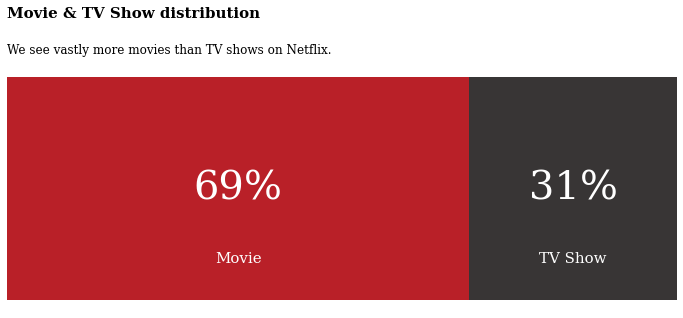

In [28]:
fig, ax = plt.subplots(1,1,figsize=(12, 4.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

Yearly number of Movies on Netflix is more than the number of TV Shows. Almost 69% are movies while remaining 31% are TV Shows.

### Country Wise Count of content

In [29]:
def countplot_v(x,order,x_label,title):
  plt.figure(figsize=(15,7))

  # Plotting the values in dependent variable
  ax=sns.countplot(x=x, hue='type', data=dataset,order = order.value_counts().index[:10])
  #Annotate the bars with their values
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12,color='#607B8B',xytext=(0, 8),textcoords='offset points')

  ax.set(xlabel=x_label, ylabel = "")
  plt.title(title)


  plt.show()

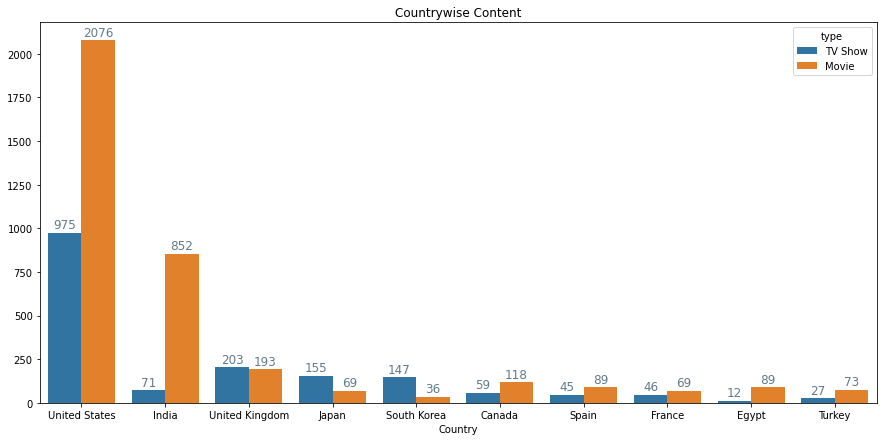

In [30]:
countplot_v("country",dataset['country'],"Country",'Countrywise Content')

The United States account for the majority of the content created on Netflix, numbering 3051 titles. India is the second largest with 923 titles.

##Year Wise Count of content added

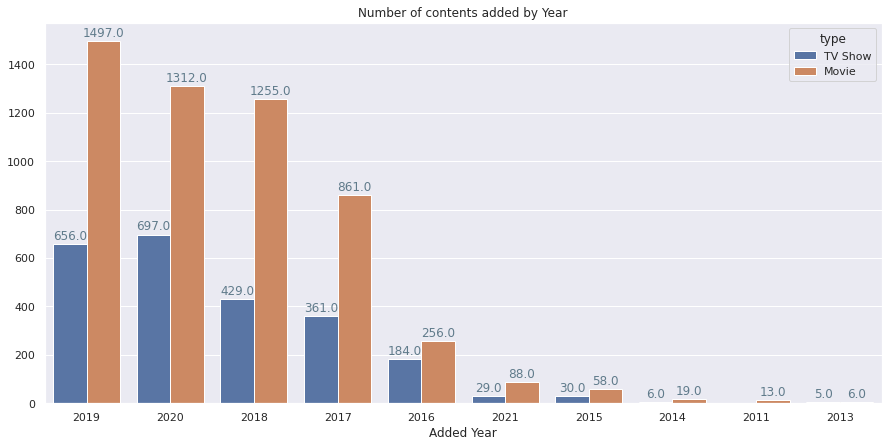

In [75]:
countplot_v("year_added",dataset['year_added'],"Added Year",'Number of contents added by Year')

Number of contents on the platform is increasing year on year. There is drastic increase in 2016-2017, this is probably Netflix was launched in India this year. And to attract Indian viewers it started adding Indian contents as well.

## Year wise content added and released by Netflix

In [32]:
# Create a list of years when content was added
years = list(range(2008,2022,1))
# Seperate Rows having only movies as content
movie_rows=dataset.loc[dataset["type"] == "Movie"]
# Seperate Rows having only TV Shows as content
tv_rows=dataset.loc[dataset["type"]=="TV Show"]

movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

Text(0.5, 1.0, 'Movies/TV Shows added per Year')

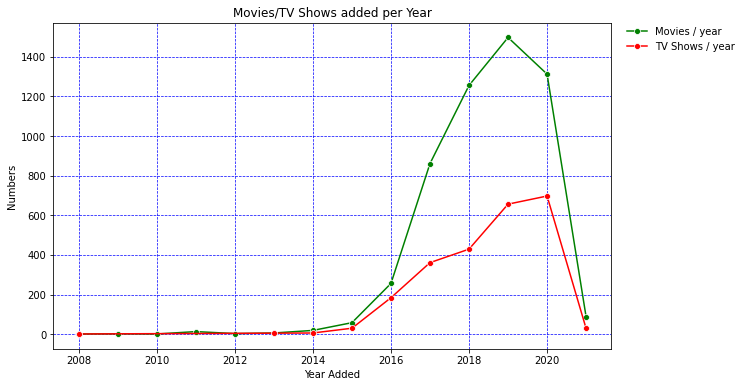

In [33]:
# Create a line plot
plt.figure(figsize=(10,6))

sns.lineplot(data=movies, color="green",  label="Movies / year",marker='o')
sns.lineplot(data=tv_shows, color="red",  label="TV Shows / year",marker='o')

# Draw grid lines with blue color and dashed style
plt.grid(color='blue', linestyle='--', linewidth=0.7)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel("Year Added")
plt.ylabel("Numbers")
plt.title('Movies/TV Shows added per Year')

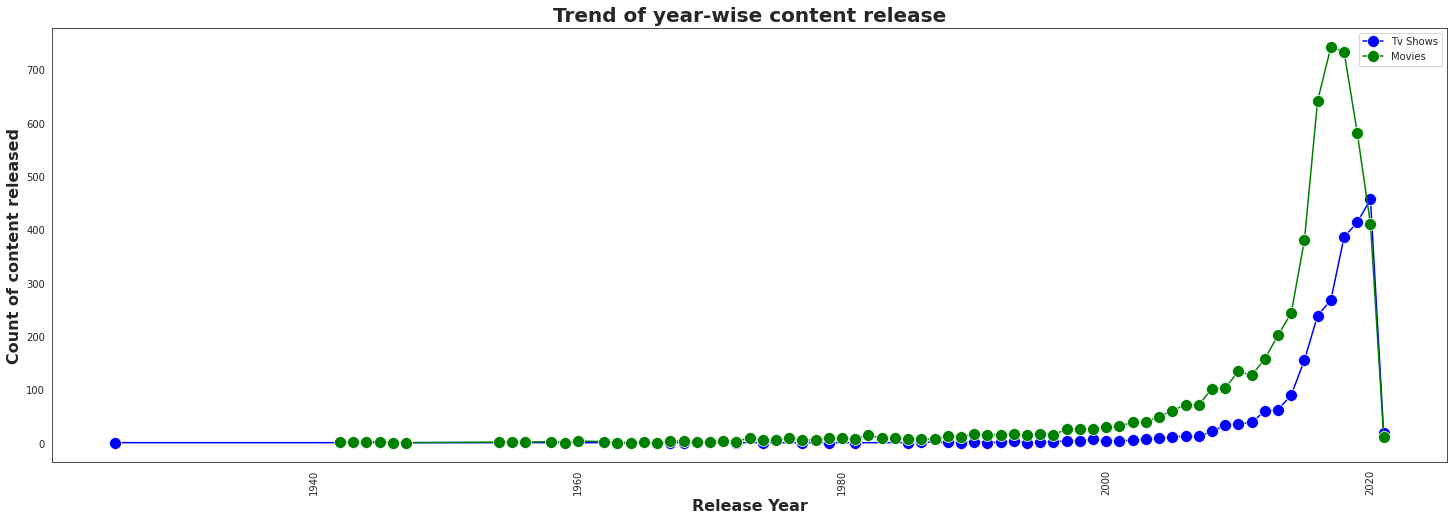

In [34]:
#Trend of year-wise content release
sns.set_style("white")
plt.figure(figsize=(25,8))
data_tvshow= dataset[dataset['type']=='TV Show']
data_tvshow= data_tvshow.groupby('release_year')['show_id'].count().reset_index(name='TV_count')
data_movie= dataset[dataset['type']=='Movie']
data_movie= data_movie.groupby('release_year')['show_id'].count().reset_index(name='Movie_count')
 
plot1= sns.lineplot(x=data_tvshow['release_year'], y=data_tvshow['TV_count'], data=data_tvshow, color= 'Blue', marker= 'o', markersize= 12)
plot2= sns.lineplot(x=data_movie['release_year'], y=data_movie['Movie_count'], data=data_movie, color= 'Green', marker= 'o', markersize= 12)

plt.xlabel('Release Year', weight='bold', fontsize=16)
plt.ylabel('Count of content released', weight='bold', fontsize=16)
plt.title("Trend of year-wise content release", weight='bold', fontsize=20)
plt.xticks(rotation='vertical')
label=['Tv Shows','Movies']
plt.legend(label)
plt.show()

##**Description of Content Ratings**
TV Content Ratings

TV-Y: Appropriate for all children

TV-Y7: For children aged 7 and above

TV-Y7-FV: For children aged 7 and above, program has more intense fantasy violence

TV-G: General Audience

TV-PG: Parental Guidance Suggested

TV-14: Content might be unsuitable for children under 14 years age

TV-MA: Mature audience only (above 17 years of age)

**Movie Ratings**

G: Genaral Audience

PG: Parental Guidance, some content may not be suitable for children

PG-13: Some material may be inappropriate for children under 13

R: Under 17 accompanying with parent/guardian will be allowed

NC-17: No one 17 and under admitted

NR/UR: Not rated or unrated

In [35]:
dataset['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

###Rating Wise count of content

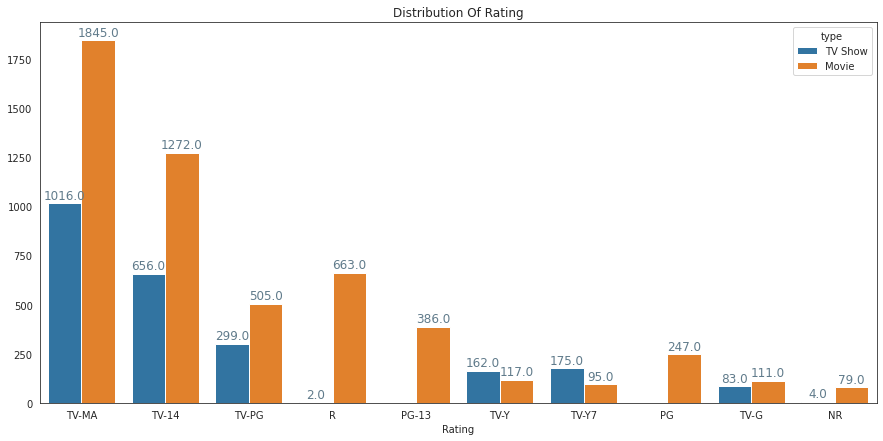

In [36]:
countplot_v("rating",dataset['rating'],"Rating",'Distribution Of Rating')

The shows with a rating of TV-MA are in the clear majority. This is followed by TV-14.These top two ratings have way too much numbers of contents compared to other ratings.

In [37]:
#Function to populate values for 'appropriate_For' feature
def APPROPRIATE_FOR_WHOM (rating):
  appropriate_For = ''
  if (rating== 'TV-MA' or rating== 'NR' or rating=='NC-17' or rating=='UR'):
    appropriate_For= 'Adults Only'
  elif (rating== 'R' or rating== 'PG-13' or rating== 'TV-14'):
    appropriate_For= 'Teenage'
  elif (rating=='TV-Y7' or rating=='TV-Y7-FV' or rating== 'PG' or rating== 'TV-PG'):
    appropriate_For= 'Kid_7_to_13'
  else:
    appropriate_For= 'Kids'

  return appropriate_For

In [38]:
#FEATURE ENGINEERING #Creating new column 'appropriate_For'
dataset['appropriate_For'] = dataset.apply(lambda x: APPROPRIATE_FOR_WHOM(x['rating']), axis=1)

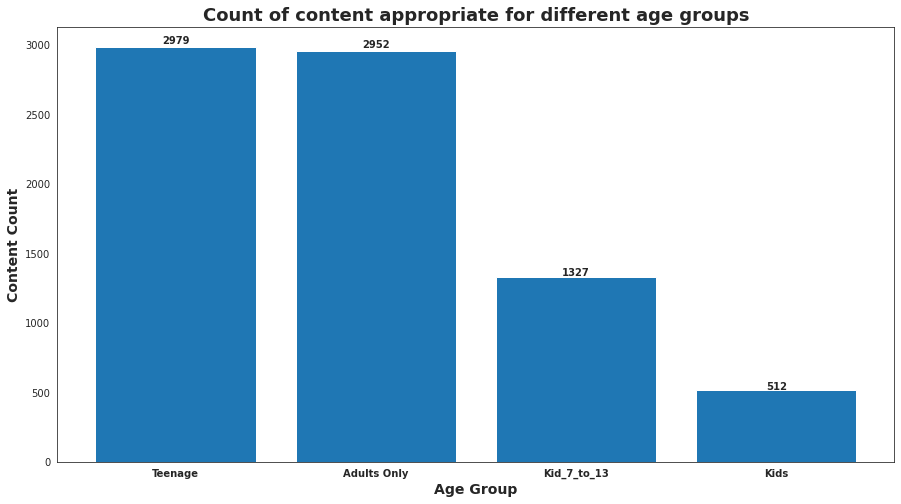

In [39]:
#Count of content appropriate for defferent age groups
data= dataset.groupby('appropriate_For')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
graph = plt.bar(data['appropriate_For'], data['show_id'])

plt.title('Count of content appropriate for different age groups', weight='bold', fontsize= 18)
plt.xlabel('Age Group', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['appropriate_For'], weight= 'bold', fontsize= 10)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

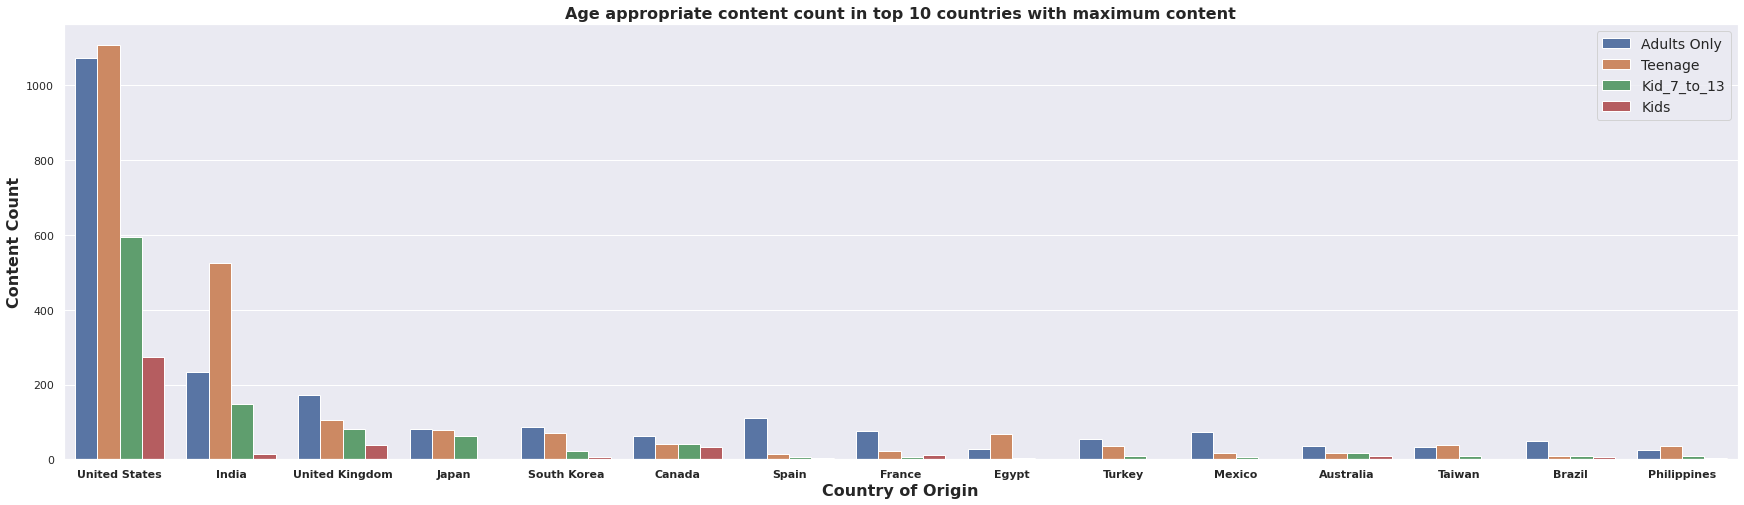

In [40]:
#Proportion of age-wise content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(30,8))
ax=sns.countplot(x="country",data= dataset,hue= "appropriate_For",order = dataset['country'].value_counts().index[0:15])
plt.xticks(weight='bold')
plt.xlabel('Country of Origin', weight='bold', fontsize=16)
plt.ylabel('Content Count', weight='bold', fontsize=16)
plt.title("Age appropriate content count in top 10 countries with maximum content", weight='bold', fontsize=16)
plt.legend(loc='upper right', fontsize=14)
plt.show()

## Top 10 Genres in Movie and TV show Content

In [41]:
#Getting Movies and TV show records in seperate dataframes
movies_df= dataset[dataset['type']=='Movie']
tvshow_df= dataset[dataset['type']=='TV Show']

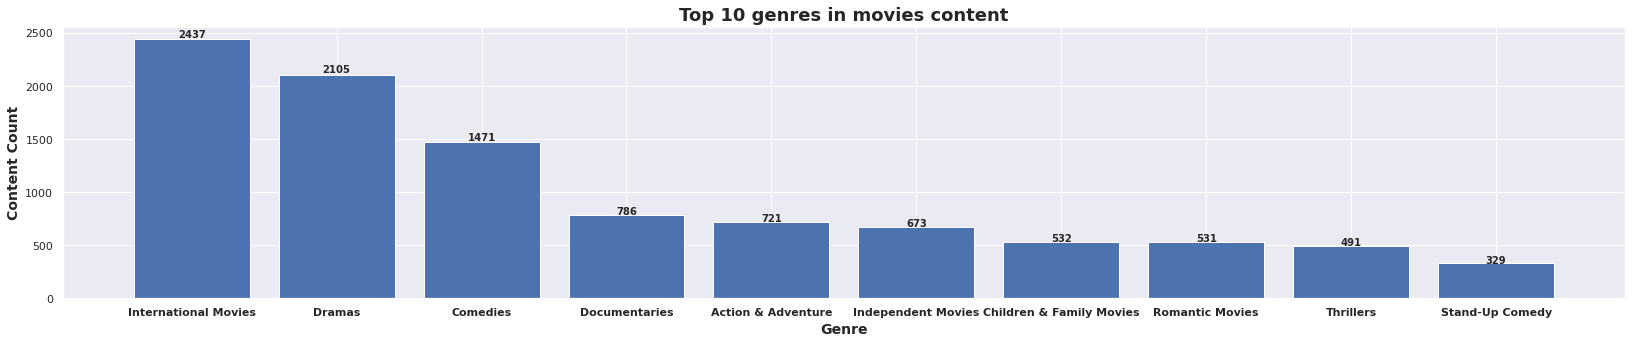

In [42]:
#Top 10 genres in Movies content
movies_genre_dict= {' ':0}
movies_genre_list= list(movies_df['listed_in'])
import pdb

for item in movies_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in movies_genre_dict.keys():
      movies_genre_dict[i]= movies_genre_dict[i]+1
    else:
      movies_genre_dict[i]= 1
movies_genre_df= pd.DataFrame(movies_genre_dict.items(), columns=['Genre', 'Count'])
data= movies_genre_df.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(28,5))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in movies content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In movie content International Movies, Dramas and Comedies are top 3 genres.

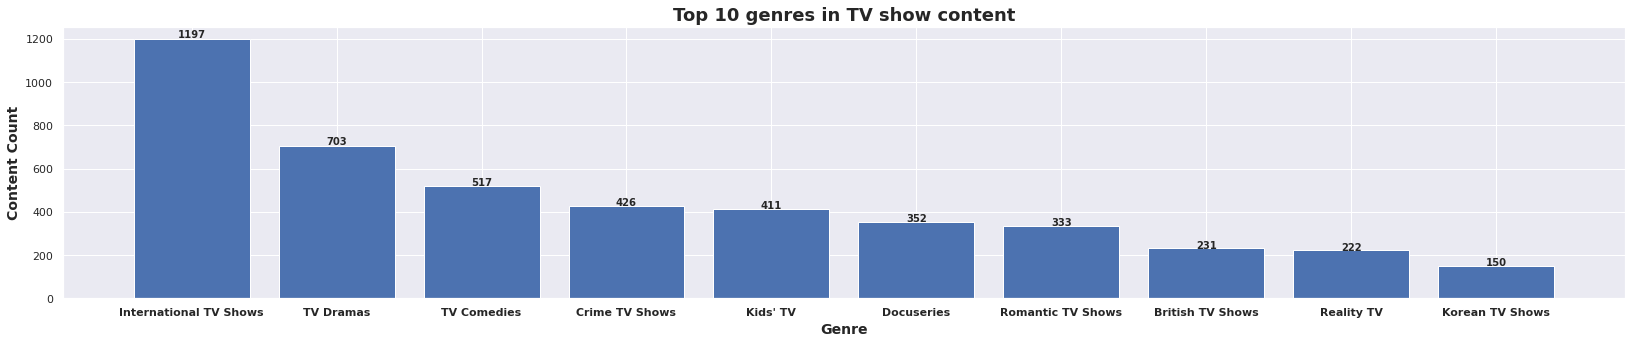

In [43]:
#Top 10 genres in TV shows content
tvshow_genre_dict= {' ':0}
tvshow_genre_list= list(tvshow_df['listed_in'])
import pdb

for item in tvshow_genre_list:
  #pdb.set_trace()
  flag= 3
  item= item.split(', ')
  for i in item:
    if i in tvshow_genre_dict.keys():
      tvshow_genre_dict[i]= tvshow_genre_dict[i]+1
    else:
      tvshow_genre_dict[i]= 1
tvshow_genre_df= pd.DataFrame(tvshow_genre_dict.items(), columns=['Genre', 'Count'])
data= tvshow_genre_df.sort_values(by='Count', ascending=False).head(10)
plt.figure(figsize=(28,5))
graph = plt.bar(data['Genre'], data['Count'])

plt.title('Top 10 genres in TV show content', weight='bold', fontsize= 18)
plt.xlabel('Genre', weight='bold', fontsize= 14)
plt.ylabel('Content Count', weight='bold', fontsize= 14)
plt.xticks(data['Genre'], weight='bold')
labels= []
for item in data['Count']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

Top 3 genres in TV show content are International TV Shows, TV Dramas and TV Comedies.

## No. of shows as per seasons

In [44]:
tvshow_df['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

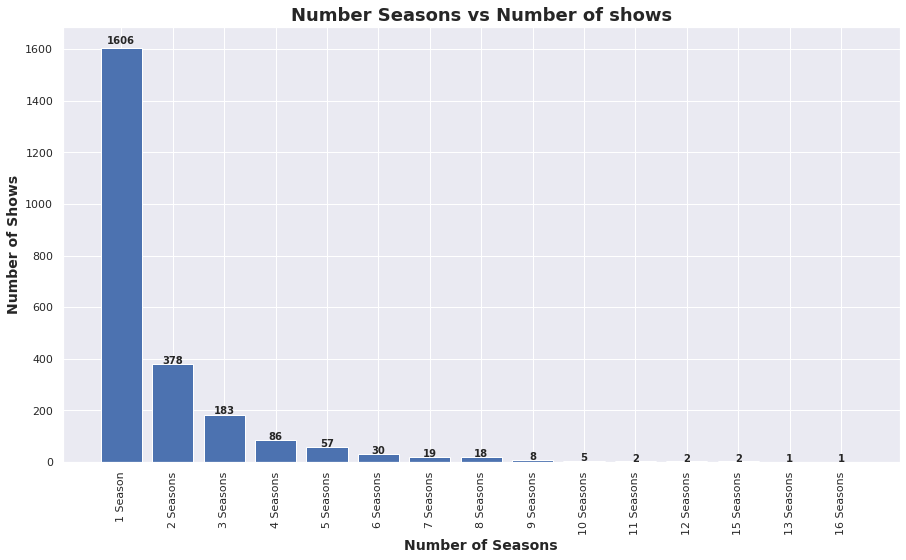

In [45]:
#Number Seasons vs Number of shows
data= tvshow_df.groupby('duration')['show_id'].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,8))
graph = plt.bar(data['duration'], data['show_id'])

plt.title('Number Seasons vs Number of shows', weight='bold', fontsize= 18)
plt.xlabel('Number of Seasons', weight='bold', fontsize= 14)
plt.ylabel('Number of Shows', weight='bold', fontsize= 14)
plt.xticks(data['duration'], rotation=90)
labels= []
for item in data['show_id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

# **Data Preparation**

##**Text Pre-processing**

Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.

###Removing Punctuations

In [48]:
# import important libraries for text preprocessing
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def remove_punctuation(text):
    '''a function for removing punctuation'''

    import string
    
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [50]:
# Applying the function to remove punctuations
dataset['description'] = dataset['description'].apply(remove_punctuation)

# Applying the function to remove punctuations
dataset['listed_in'] = dataset['listed_in'].apply(remove_punctuation)

###Removing Stopwords

With english, among many popular languages, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.We will make good use of the NLTK library by importing the pre-programmed english stop words library.

In [51]:
# extracting the stopwords from nltk library
from nltk.corpus import stopwords
sw = stopwords.words('english')

# Function to remove stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [52]:
# Applying the stopword function
dataset['description'] = dataset['description'].apply(stopwords)

# Applying the stopword function
dataset['listed_in'] = dataset['listed_in'].apply(stopwords)

### Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

Here we are using the "SnowballStemmer" algorithm. It is a better version of the Porter Stemmer.

In [53]:
# create an object of stemming function
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)  

In [54]:
#stemming for description
dataset['description'] = dataset['description'].apply(stemming)

### Creating New Variables for Text Length

The text length is very likely to influence any kind of similarity score. In general:

* String containing very few words will have their highest similarity scores with other short strings with which they share one or two words in common. However if the words they contain are not common at all, they will have a lot of zero similarity scores (possibly only zeros).
* Long strings (i.e. with many words) usually have low similarity scores, simply because they are unlikely to have a high proportion of their words in common. However compared to short strings they rarely have no word in common so they are much less likely to have lots of zero similarity scores. As a result strings of similar length may tend to cluster together, depending on the data.

In [55]:
# Create a function to display text length
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [56]:
# Create two variables for description and listed-in texts length respectively
dataset['desc_length'] = dataset['description'].apply(length)
dataset['listed_length'] = dataset['listed_in'].apply(length)

##**Rescaling the data**

In [57]:
# Standardizing value to generalise
X_features=dataset[['desc_length','listed_length']]
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [58]:
# Normalizing value to generalise
from sklearn.preprocessing import MinMaxScaler
X_features_n=dataset[['desc_length','listed_length']]
norm=preprocessing.MinMaxScaler()
X_n=norm.fit_transform(X_features_n)

#**Implementing K-Means**

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.Let's go ahead and import important tools to apply K-means clustering

In [59]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

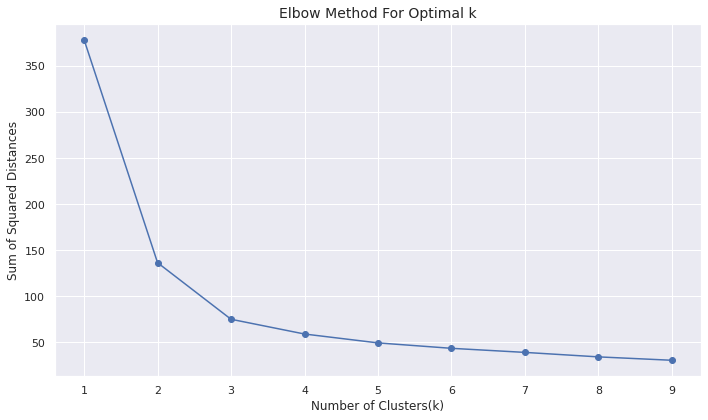

In [60]:
# Create a list
list_1 = []

# for loop to append kmeans inertia values
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_n)
    list_1.append(kmeans.inertia_)

#Plot linegraph
plt.figure(figsize=(10,6))

plt.plot(range(1,10),list_1,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters(k)",fontsize=12)
plt.ylabel("Sum of Squared Distances",fontsize=12)
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

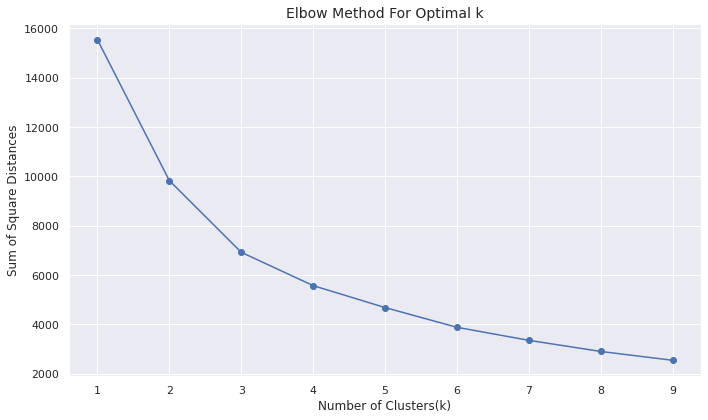

In [61]:
# Create a list
list_1 = []

# for loop to append kmeans inertia values
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    list_1.append(kmeans.inertia_)

#Plot linegraph
plt.figure(figsize=(10,6))

plt.plot(range(1,10),list_1,"-o")
plt.grid(True)
plt.xlabel("Number of Clusters(k)",fontsize=12)
plt.ylabel("Sum of Square Distances",fontsize=12)
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()

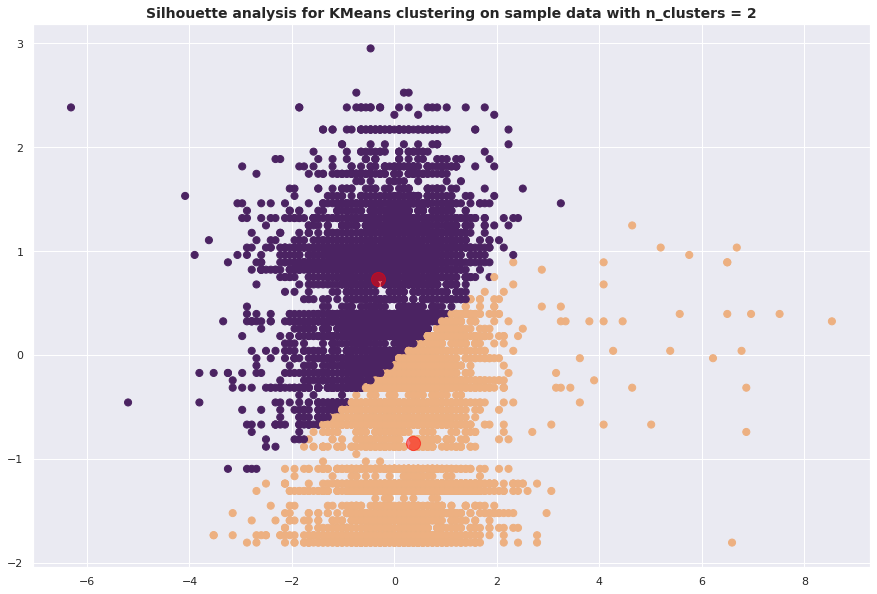

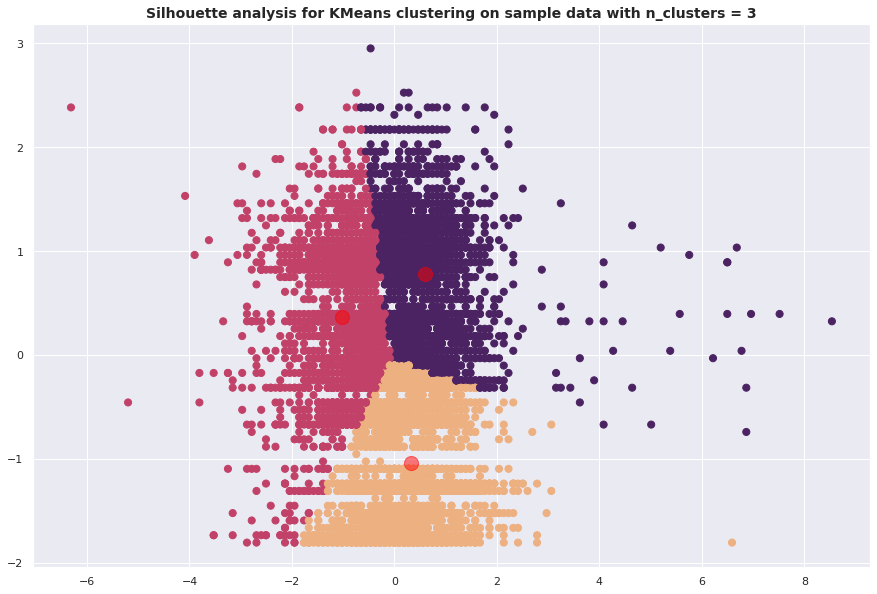

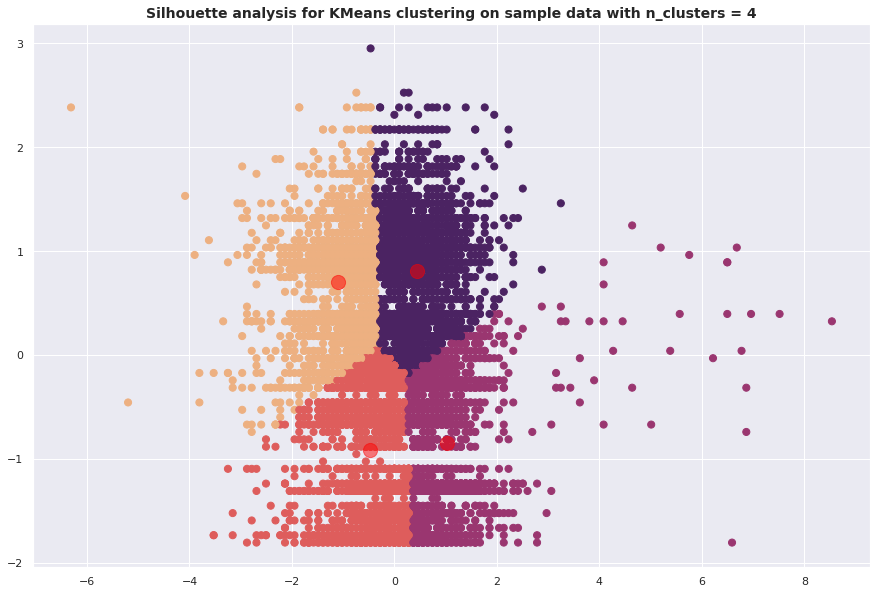

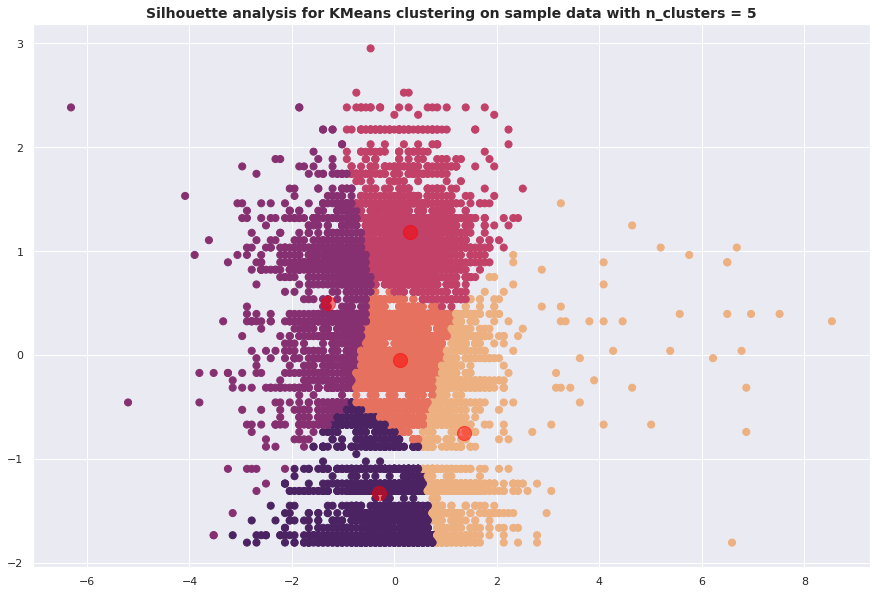

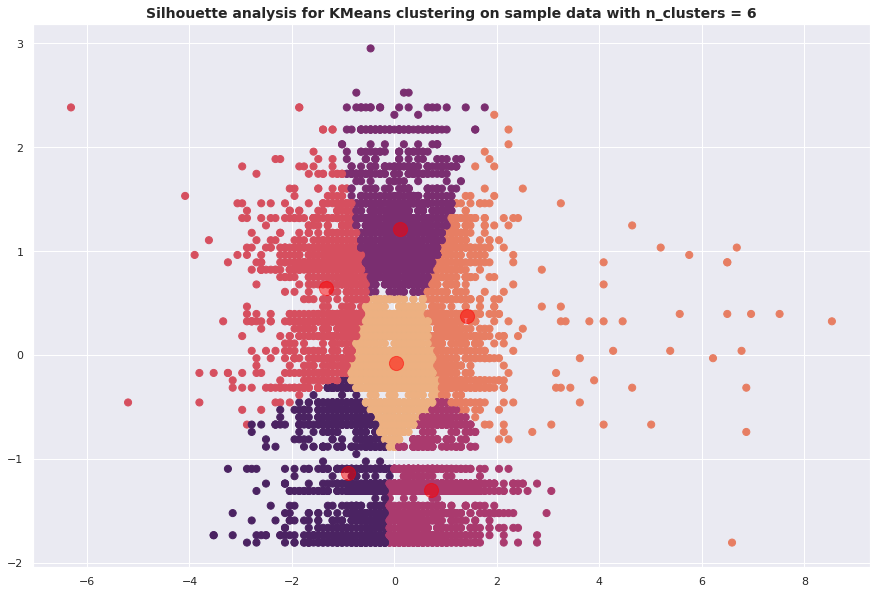

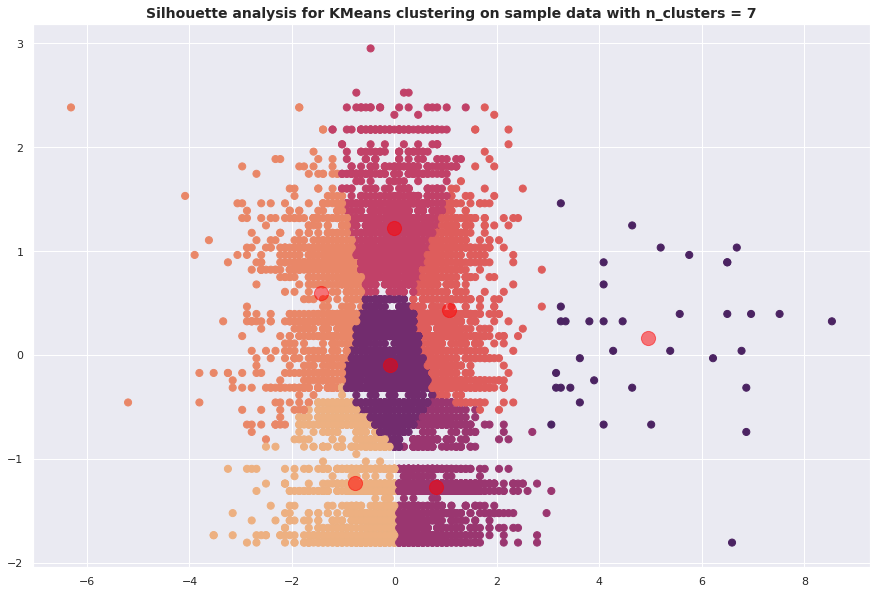

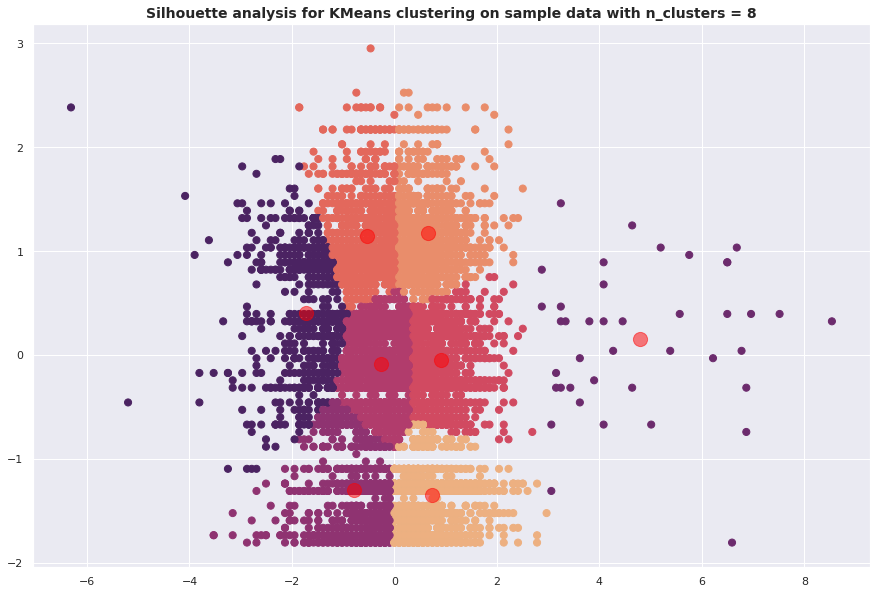

In [63]:
v=2
for i in (2,3,4,5,6,7,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans= kmeans.predict(X)
  plt.figure(figsize=(15,10))
  n =v+1
  #plt.title('description and listed_in for clusters')
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='flare')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i),
                 fontsize=14, fontweight='bold')

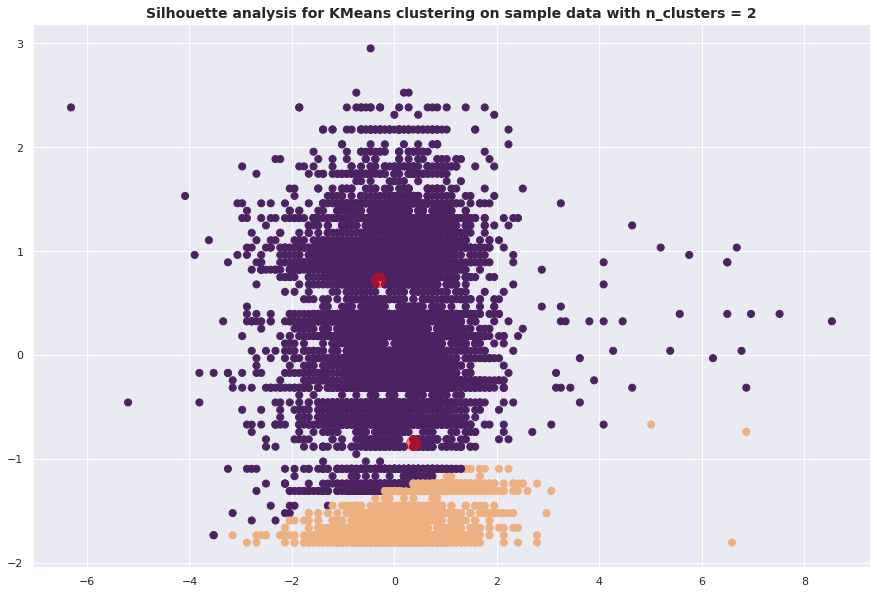

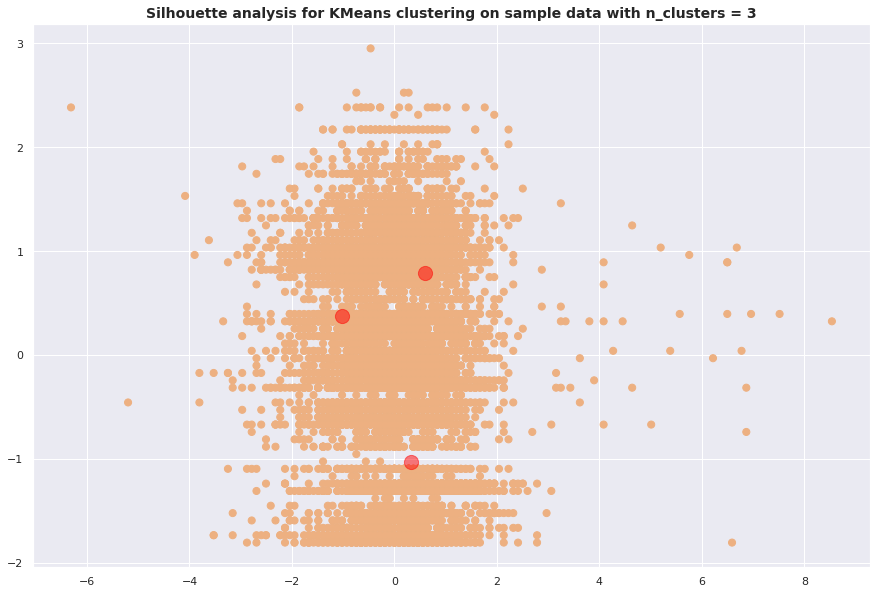

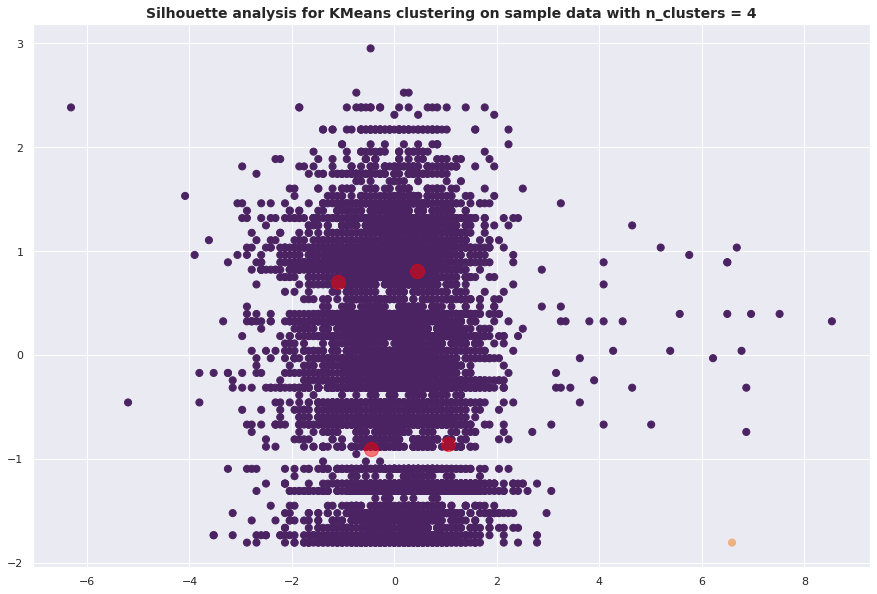

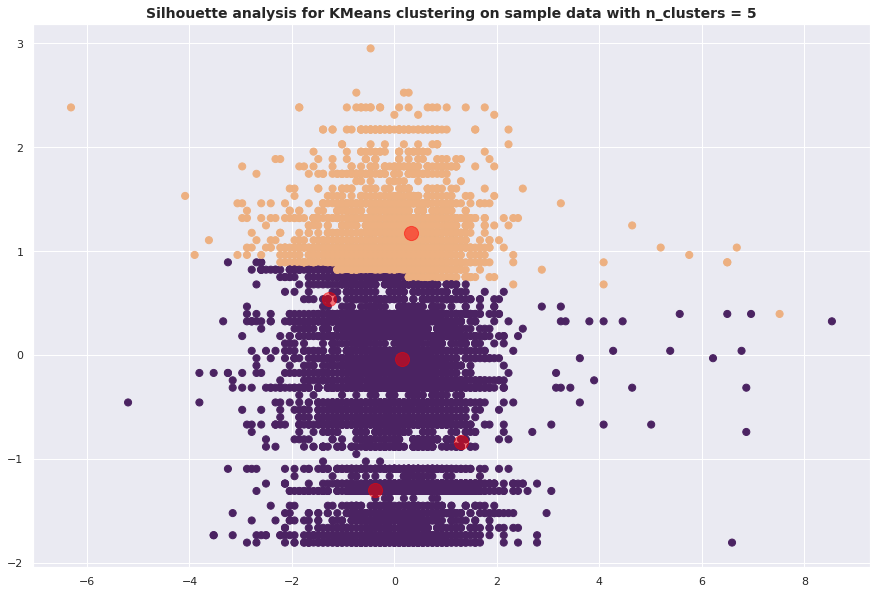

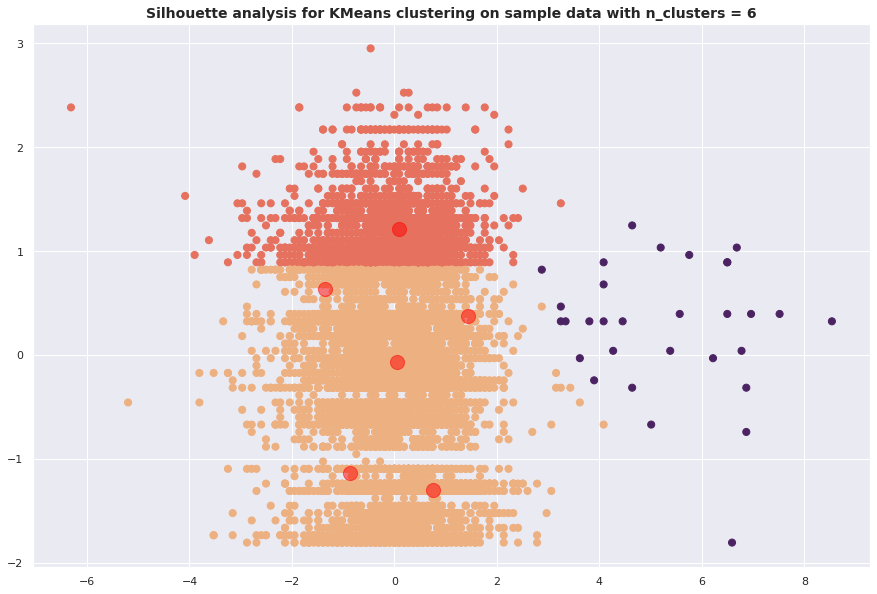

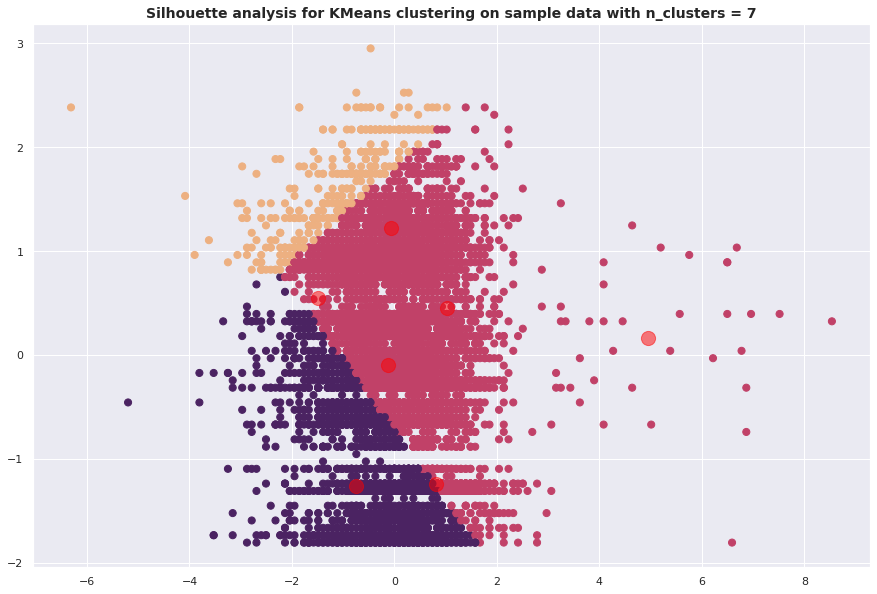

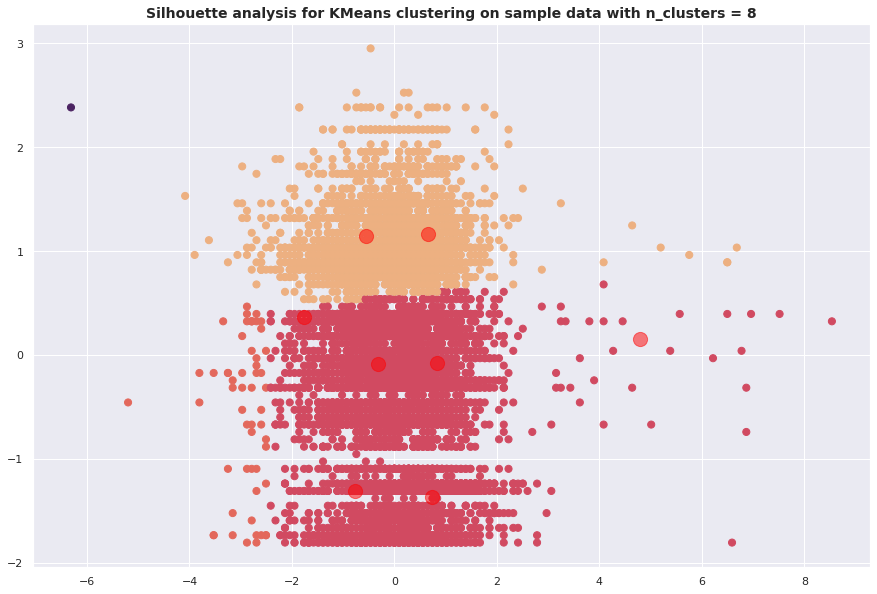

In [64]:
v=2
for i in (2,3,4,5,6,7,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  y_kmeans= kmeans.predict(X_n)
  plt.figure(figsize=(15,10))
  n =v+1
  #plt.title('description and listed_in for clusters')
  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='flare')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
  plt.title(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i),
                 fontsize=14, fontweight='bold')

**Let's see the Silhouette scores of different clusters**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is 

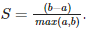

In [65]:
# Calculate silhoutte score for K-means
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.35512756429120607

For n_clusters = 3, silhouette score is 0.3558545073559524

For n_clusters = 4, silhouette score is 0.3281130746442887

For n_clusters = 5, silhouette score is 0.33585923304123133

For n_clusters = 6, silhouette score is 0.3572596839713048

For n_clusters = 7, silhouette score is 0.35485725266624235

For n_clusters = 8, silhouette score is 0.35381821107922423


In [66]:
# Calculate silhoutte score for K-means
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_n)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.3509887087812235

For n_clusters = 3, silhouette score is 0.27896356868606415

For n_clusters = 4, silhouette score is 0.20091668219699743

For n_clusters = 5, silhouette score is 0.174221047463151

For n_clusters = 6, silhouette score is 0.17645649618157344

For n_clusters = 7, silhouette score is 0.21589162635087844

For n_clusters = 8, silhouette score is 0.23340095350718154


After applying both normalization and Standardization, it is found the clusters can be best segregated using standardization and bcz of outliers in data, it is better to use standardardization,they will not get affected.

We had already seen earlier that k=6 was optimum for k-means clusterning.Further we found that no. of clusters = 6 is giving best silhouette score after which the score is dropping below which there are less number of clusters. Before reaching to any conclusion, let's keep this information in our memory and move ahead to apply another clustering algorithm called - Hierarchical  Clustering.

#**Implementing Hierarchical  clustering**

Hierarchical clustering is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.The hierarchical clustering technique has two approaches:

Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

In [67]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

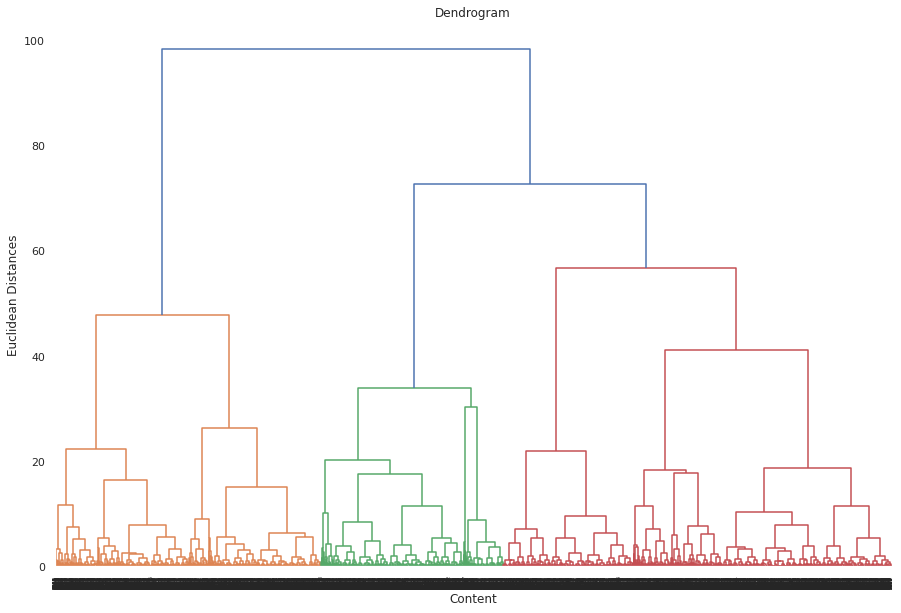

In [68]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

No. of Cluster = 6

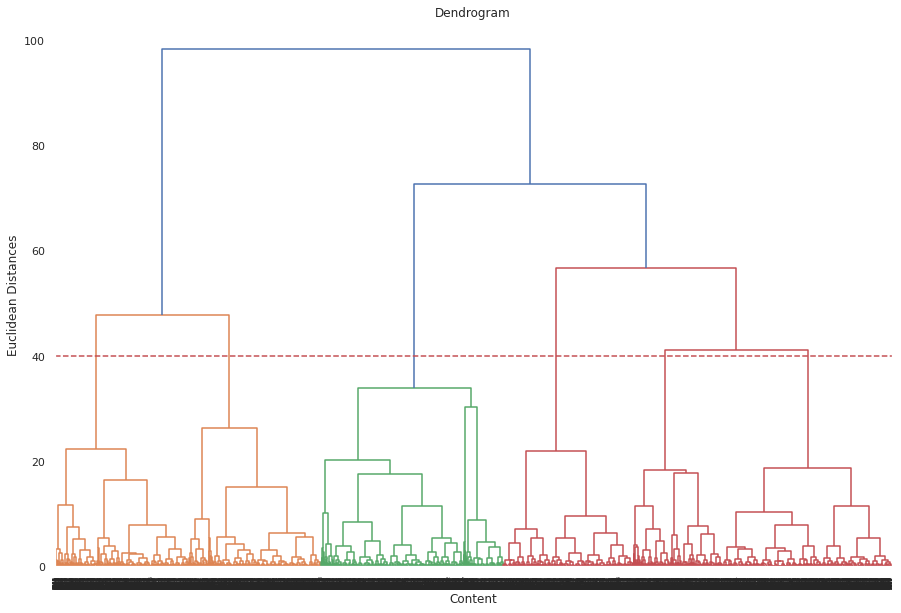

In [70]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=40, color='r', linestyle='--')
plt.show()


In [71]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

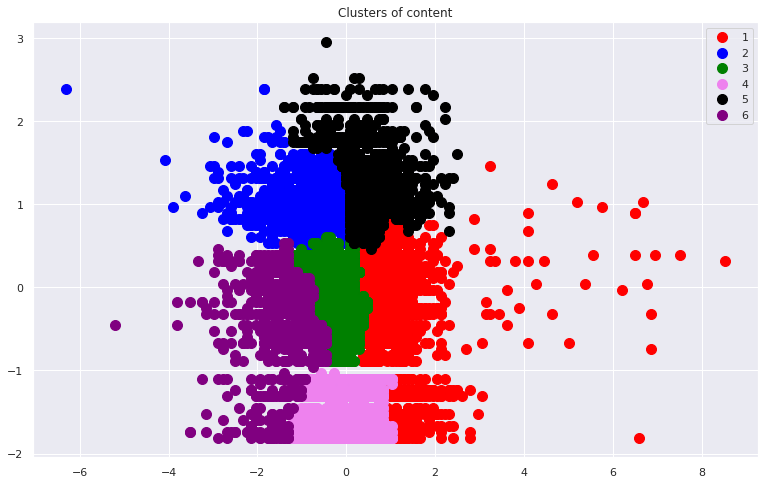

In [72]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'violet', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = '5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'purple', label = '6')


plt.title('Clusters of content')

plt.legend()
plt.show()

In [73]:
# Calculate silhoutte score for HAC
from sklearn.cluster import AgglomerativeClustering
hac_clusters = [2,3,4,5,6,7,8]
for n_clusters in hac_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)

    score = silhouette_score(X, preds)
    print("\nFor n_clusters = {}, silhouette score is {}".format(n_clusters, score))


For n_clusters = 2, silhouette score is 0.31733940335920435

For n_clusters = 3, silhouette score is 0.28576591463080314

For n_clusters = 4, silhouette score is 0.2970786181831897

For n_clusters = 5, silhouette score is 0.2818170622516962

For n_clusters = 6, silhouette score is 0.3004594443021899

For n_clusters = 7, silhouette score is 0.31843009608053685

For n_clusters = 8, silhouette score is 0.3102634162499398


The silhouette score of 6 clusters in  K-means was in the range of 0.35 while in case of HAC we are getting  0.3184.

#Recommender System

In [76]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [77]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [78]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [79]:
#type 
# title
# show_id
# director
# cast
# country
# rating
# listed_in
# description
dataset_copy = df[['show_id','title', 'cast', 'country','rating','listed_in','description']]

In [80]:
dataset_copy.head()

,show_id,title,cast,country,rating,listed_in,description
0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


In [81]:
dataset_copy.dropna(inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [82]:
dataset_copy.shape

(6652, 7)

In [83]:
dataset_copy.head()

,show_id,title,cast,country,rating,listed_in,description
0,s1,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,Dramas,A brilliant group of students become card-coun...


In [84]:
dataset_copy['description'] = dataset_copy['description'].apply(lambda x:x.split())
dataset_copy['country'] = dataset_copy['country'].apply(lambda x:x.split(','))
dataset_copy['cast'] = dataset_copy['cast'].apply(lambda x:x.split(','))
dataset_copy['rating'] = dataset_copy['rating'].apply(lambda x:x.split(','))
dataset_copy['listed_in'] = dataset_copy['listed_in'].apply(lambda x:x.split(','))

<ipython-input-84-31ab29851a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['description'] = dataset_copy['description'].apply(lambda x:x.split())
<ipython-input-84-31ab29851a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['country'] = dataset_copy['country'].apply(lambda x:x.split(','))
<ipython-input-84-31ab29851a57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [85]:
dataset_copy.head()

,show_id,title,cast,country,rating,listed_in,description
0,s1,3%,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],[TV-MA],"[International TV Shows, TV Dramas, TV Sci-F...","[In, a, future, where, the, elite, inhabit, an..."
1,s2,7:19,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],[TV-MA],"[Dramas, International Movies]","[After, a, devastating, earthquake, hits, Mexi..."
2,s3,23:59,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],[R],"[Horror Movies, International Movies]","[When, an, army, recruit, is, found, dead,, hi..."
3,s4,9,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],[PG-13],"[Action & Adventure, Independent Movies, Sci...","[In, a, postapocalyptic, world,, rag-doll, rob..."
4,s5,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],[PG-13],[Dramas],"[A, brilliant, group, of, students, become, ca..."


In [86]:
dataset_copy['cast'] = dataset_copy['cast'].apply(lambda x:[i.replace(' ','') for i in x])
dataset_copy['country'] = dataset_copy['country'].apply(lambda x:[i.replace(' ','') for i in x])
dataset_copy['listed_in'] = dataset_copy['listed_in'].apply(lambda x:[i.replace(' ','') for i in x])


<ipython-input-86-43edaace5ca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['cast'] = dataset_copy['cast'].apply(lambda x:[i.replace(' ','') for i in x])
<ipython-input-86-43edaace5ca1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['country'] = dataset_copy['country'].apply(lambda x:[i.replace(' ','') for i in x])
<ipython-input-86-43edaace5ca1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [87]:
dataset_copy.head()

,show_id,title,cast,country,rating,listed_in,description
0,s1,3%,"[JoãoMiguel, BiancaComparato, MichelGomes, Rod...",[Brazil],[TV-MA],"[InternationalTVShows, TVDramas, TVSci-Fi&Fant...","[In, a, future, where, the, elite, inhabit, an..."
1,s2,7:19,"[DemiánBichir, HéctorBonilla, OscarSerrano, Az...",[Mexico],[TV-MA],"[Dramas, InternationalMovies]","[After, a, devastating, earthquake, hits, Mexi..."
2,s3,23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],[R],"[HorrorMovies, InternationalMovies]","[When, an, army, recruit, is, found, dead,, hi..."
3,s4,9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],[PG-13],"[Action&Adventure, IndependentMovies, Sci-Fi&F...","[In, a, postapocalyptic, world,, rag-doll, rob..."
4,s5,21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],[PG-13],[Dramas],"[A, brilliant, group, of, students, become, ca..."


In [88]:
dataset_copy['tags'] = dataset_copy['cast'] + dataset_copy['country'] + dataset_copy['rating'] + dataset_copy['listed_in'] + dataset_copy['description']

<ipython-input-88-1b7d06998e2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['tags'] = dataset_copy['cast'] + dataset_copy['country'] + dataset_copy['rating'] + dataset_copy['listed_in'] + dataset_copy['description']


In [89]:
dataset_copy.head()

,show_id,title,cast,country,rating,listed_in,description,tags
0,s1,3%,"[JoãoMiguel, BiancaComparato, MichelGomes, Rod...",[Brazil],[TV-MA],"[InternationalTVShows, TVDramas, TVSci-Fi&Fant...","[In, a, future, where, the, elite, inhabit, an...","[JoãoMiguel, BiancaComparato, MichelGomes, Rod..."
1,s2,7:19,"[DemiánBichir, HéctorBonilla, OscarSerrano, Az...",[Mexico],[TV-MA],"[Dramas, InternationalMovies]","[After, a, devastating, earthquake, hits, Mexi...","[DemiánBichir, HéctorBonilla, OscarSerrano, Az..."
2,s3,23:59,"[TeddChan, StellaChung, HenleyHii, LawrenceKoh...",[Singapore],[R],"[HorrorMovies, InternationalMovies]","[When, an, army, recruit, is, found, dead,, hi...","[TeddChan, StellaChung, HenleyHii, LawrenceKoh..."
3,s4,9,"[ElijahWood, JohnC.Reilly, JenniferConnelly, C...",[UnitedStates],[PG-13],"[Action&Adventure, IndependentMovies, Sci-Fi&F...","[In, a, postapocalyptic, world,, rag-doll, rob...","[ElijahWood, JohnC.Reilly, JenniferConnelly, C..."
4,s5,21,"[JimSturgess, KevinSpacey, KateBosworth, Aaron...",[UnitedStates],[PG-13],[Dramas],"[A, brilliant, group, of, students, become, ca...","[JimSturgess, KevinSpacey, KateBosworth, Aaron..."


In [90]:
new_df = dataset_copy[['show_id', 'title', 'tags']]

In [ ]:
new_df.head()

,show_id,title,tags
1,s2,Blood & Water,"[AmaQamata, KhosiNgema, GailMabalane, ThabangM..."
4,s5,Kota Factory,"[MayurMore, JitendraKumar, RanjanRaj, AlamKhan..."
7,s8,Sankofa,"[KofiGhanaba, OyafunmikeOgunlano, AlexandraDua..."
8,s9,The Great British Baking Show,"[MelGiedroyc, SuePerkins, MaryBerry, PaulHolly..."
9,s10,The Starling,"[MelissaMcCarthy, ChrisO'Dowd, KevinKline, Tim..."


In [91]:
new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))

<ipython-input-91-68a616cd60db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:' '.join(x))


In [92]:
new_df.reset_index(inplace=True)

In [93]:
new_df.drop("index", axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
new_df.tail(100)

,show_id,title,tags
6552,s7675,Wrong Kind of Black,ClarenceRyan AaronL.McGrath LisaFlanagan Tommy...
6553,s7676,Wrong No.,JavedSheikh DanishTaimoor JanitaAsma NayyarEja...
6554,s7677,Wrong Side Raju,PratikGandhi KimberleyLouisaMcBeath AsifBasra ...
6555,s7678,Wu Assassins,IkoUwais KatherynWinnick ByronMann TommyFlanag...
6556,s7679,WWII in HD,GarySinise RobLowe JoshLucas JustinBartha AmyS...
...,...,...,...
6647,s7781,Zoo,ShashankArora ShwetaTripathi RahulKumar GopalK...
6648,s7782,Zoom,TimAllen CourteneyCox ChevyChase KateMara Ryan...
6649,s7783,Zozo,ImadCreidi AntoinetteTurk EliasGergi CarmenLeb...
6650,s7784,Zubaan,VickyKaushal Sarah-JaneDias RaaghavChanana Man...


In [95]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-95-8b60b591a07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [96]:
new_df.head()

,show_id,title,tags
0,s1,3%,joãomiguel biancacomparato michelgomes rodolfo...
1,s2,7:19,demiánbichir héctorbonilla oscarserrano azalia...
2,s3,23:59,teddchan stellachung henleyhii lawrencekoh tom...
3,s4,9,elijahwood johnc.reilly jenniferconnelly chris...
4,s5,21,jimsturgess kevinspacey katebosworth aaronyoo ...


In [97]:
#Applying stemming
! pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [99]:
def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))
  return(' '.join(y))


In [100]:
new_df['tags'] = new_df['tags'].apply(stem)

<ipython-input-100-be18a4346d89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [101]:
# importing countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 7000, stop_words ='english')

In [102]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [103]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '14th',
 '15',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '18th',
 '19',
 '1920',
 '1930',
 '1950',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1979',
 '1980',
 '1980s',
 '1989',
 '1990',
 '1990s',
 '1992',
 '1994',
 '19th',
 '20',
 '2011',
 '2012',
 '2015',
 '20th',
 '21st',
 '24',
 '25',
 '28',
 '30',
 '32',
 '40',
 '40th',
 '50',
 '500',
 '50cent',
 '60',
 '80',
 '90',
 '90s',
 'aakashdabhad',
 'aamirbashir',
 'aamirkhan',
 'aaron',
 'aaronabram',
 'aaroneckhart',
 'aaronjefferi',
 'aaronpaul',
 'aaronyan',
 'aasifmandvi',
 'abandon',
 'abbytrott',
 'abdalahmishrif',
 'abduct',
 'abhaydeol',
 'abhimanyusingh',
 'abhishekbachchan',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abound',
 'abov',
 'abroad',
 'abruptli',
 'absurd',
 'abus',
 'abuse',
 'academ',
 'academi',
 'academy',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'account',
 'accus',
 'achiev',
 'acquir',
 'act',
 'action',
 'activ',
 'act

In [105]:
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
similarity = cosine_similarity(vectors)

In [107]:
similarity.shape

(6652, 6652)

In [108]:
def recommend(movie):
  movie_index = new_df[new_df['title'] == movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
  
  for i in movies_list:
    print(i)
    print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Blood & Water')

(1673, 0.35176323534072423)
Kissing Game
(2652, 0.3302891295379081)
We Are the Wave
(1068, 0.3198010745334156)
Diamond City
(3731, 0.3111879571320709)
Age of Rebellion
(2979, 0.31025261399701143)
Jinn


In [109]:
import pickle

In [110]:
pickle.dump(new_df.to_dict(), open('shows_dict.pkl', 'wb'))

In [111]:
pickle.dump(similarity, open('similarity.pkl','wb'))

#**Conclusion**

After pre-processing the data, I started with EDA to understand the trends and features of the provided dataset. Major findings from EDA are as follows:

* There is 69% movie content and 31% TV show content in the dataset.
* The United States account for the majority of the content created on Netflix, numbering 3051 titles. India is the second largest with 923 titles.
* All the top 10 countries producing highest amount of content have higher proportion of movies than TV shows except Japan, South Korea and United Kingdom.
*  Netflix is increasingly focusing on TV Shows now, which is clear from the graph, from 2019 to 2020, there was a decreasing trend of Movies.The TV shows from 2019 to 2020 remains constant.
* TV-MA, TV-14 and TV-PG are the top content rating to which highest number of content belongs.
* Among the top 10 countries with highest content volume, United States and India has highest volume of content appropriate for teens and most other countries have highest volume of content appropriate for adults.
* Content onboarding on Netflix started increasing from 2015 and reached to its peak in 2019, there is a drastic downfall in 2021. The downfall can be attributed to Covid pandemic.
* International movies is the highest content genre in movies and International TV Shows is the highest one in TV shows.
* TV shows with one season are highest in number.


Findings after applying k- means and Hierarchical clustering:

* K-means clustering is used to form the clusters of clusters of the content. To find out the optimal value of k, Elbow and Silhouette method was used.K=6 was appropriate value and can be visualized after clustering the content using k-means clustering.

* Hierarchical clustering implementation gives perfect score of silhouette at 7 clusters,same as visualised using dendrogram.